# ***Imports***

In [2]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers
# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 784 for consistency with other GAN implementations.
randomDim = 500

# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)


# ***Load Hoda dataset***

In [3]:
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
X_train, Y_train = read_hoda_dataset(dataset_path='/content/Train 60000.cdb',
                                images_height=28,
                                images_width=28,
                                one_hot=False,
                                reshape=True)
print(X_train.shape)

(60000, 784)


# ***Load Mnist dataset***

In [ ]:
(X_train, _), (_, _) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train=X_train.reshape(60000, 784)


# ***generator***

In [4]:
generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))

generator.compile(loss='binary_crossentropy', optimizer=adam)



# ***discriminator***

In [5]:

discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer=adam)



# ***Final network***

In [6]:
# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)


# ***Save gen_Images***

In [7]:

out_dir = "./gan"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    out = os.path.join(out_dir, 'simple_gan_loss_epoch_%d.png' % epoch)
    plt.savefig(out)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    out = os.path.join(out_dir, 'simple_gan_generated_image_epoch_%d.png' % epoch)
    plt.savefig(out)

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('./simple_gan_generator_epoch_%d.h5' % epoch)
    discriminator.save('./simple_gan_discriminator_epoch_%d.h5' % epoch)




# ***train***

  0%|          | 0/234 [00:00<?, ?it/s]

Epochs: 30
Batch size: 256
Batches per epoch: 234
--------------- Epoch 1 ---------------


  1%|          | 2/234 [00:00<00:14, 15.94it/s]

--------------- Epoch 2 ---------------


  1%|          | 2/234 [00:00<00:14, 16.16it/s]

--------------- Epoch 3 ---------------


  1%|          | 2/234 [00:00<00:14, 16.48it/s]

--------------- Epoch 4 ---------------


  1%|          | 2/234 [00:00<00:14, 15.93it/s]

--------------- Epoch 5 ---------------


  1%|          | 2/234 [00:00<00:14, 15.78it/s]

--------------- Epoch 6 ---------------


  1%|          | 2/234 [00:00<00:14, 16.09it/s]

--------------- Epoch 7 ---------------


  1%|          | 2/234 [00:00<00:14, 15.83it/s]

--------------- Epoch 8 ---------------


  1%|          | 2/234 [00:00<00:14, 16.45it/s]

--------------- Epoch 9 ---------------


  1%|          | 2/234 [00:00<00:14, 15.93it/s]

--------------- Epoch 10 ---------------


  1%|          | 2/234 [00:00<00:14, 15.83it/s]

--------------- Epoch 11 ---------------


  1%|          | 2/234 [00:00<00:14, 16.44it/s]

--------------- Epoch 12 ---------------


  1%|          | 2/234 [00:00<00:15, 15.09it/s]

--------------- Epoch 13 ---------------


  1%|          | 2/234 [00:00<00:14, 16.14it/s]

--------------- Epoch 14 ---------------


  1%|          | 2/234 [00:00<00:14, 16.39it/s]

--------------- Epoch 15 ---------------


  1%|          | 2/234 [00:00<00:15, 15.15it/s]

--------------- Epoch 16 ---------------


  1%|          | 2/234 [00:00<00:15, 15.38it/s]

--------------- Epoch 17 ---------------


  1%|          | 2/234 [00:00<00:14, 16.38it/s]

--------------- Epoch 18 ---------------


  1%|          | 2/234 [00:00<00:14, 15.88it/s]

--------------- Epoch 19 ---------------


  1%|          | 2/234 [00:00<00:14, 16.09it/s]

--------------- Epoch 20 ---------------


  1%|          | 2/234 [00:00<00:14, 15.91it/s]

--------------- Epoch 21 ---------------


  1%|          | 2/234 [00:00<00:14, 16.10it/s]

--------------- Epoch 22 ---------------


  1%|          | 2/234 [00:00<00:14, 15.80it/s]

--------------- Epoch 23 ---------------


  1%|          | 2/234 [00:00<00:15, 15.25it/s]

--------------- Epoch 24 ---------------


  1%|          | 2/234 [00:00<00:14, 15.88it/s]

--------------- Epoch 25 ---------------


  1%|          | 2/234 [00:00<00:14, 15.85it/s]

--------------- Epoch 26 ---------------


  1%|          | 2/234 [00:00<00:14, 15.93it/s]

--------------- Epoch 27 ---------------


  1%|          | 2/234 [00:00<00:14, 15.50it/s]

--------------- Epoch 28 ---------------


  1%|          | 2/234 [00:00<00:14, 15.90it/s]

--------------- Epoch 29 ---------------


  1%|          | 2/234 [00:00<00:14, 15.95it/s]

--------------- Epoch 30 ---------------


100%|██████████| 234/234 [00:14<00:00, 15.83it/s]


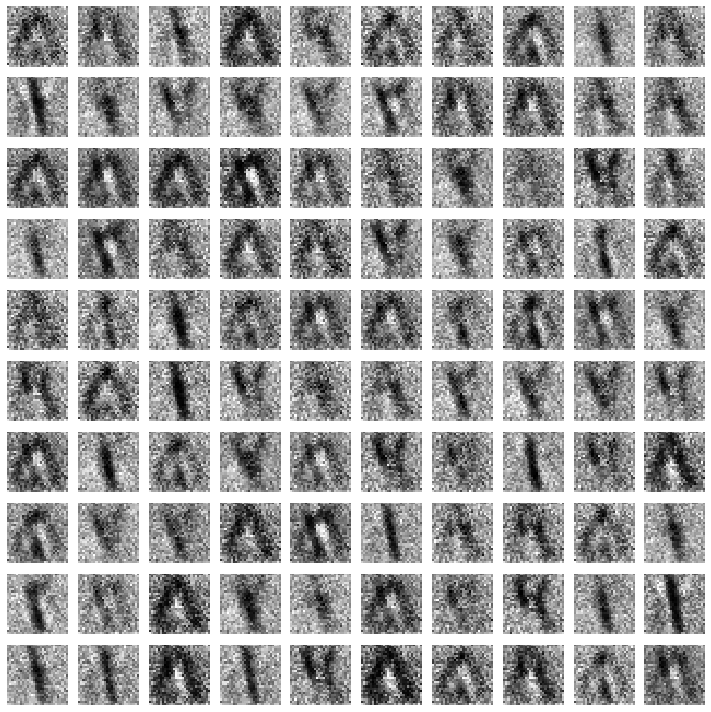

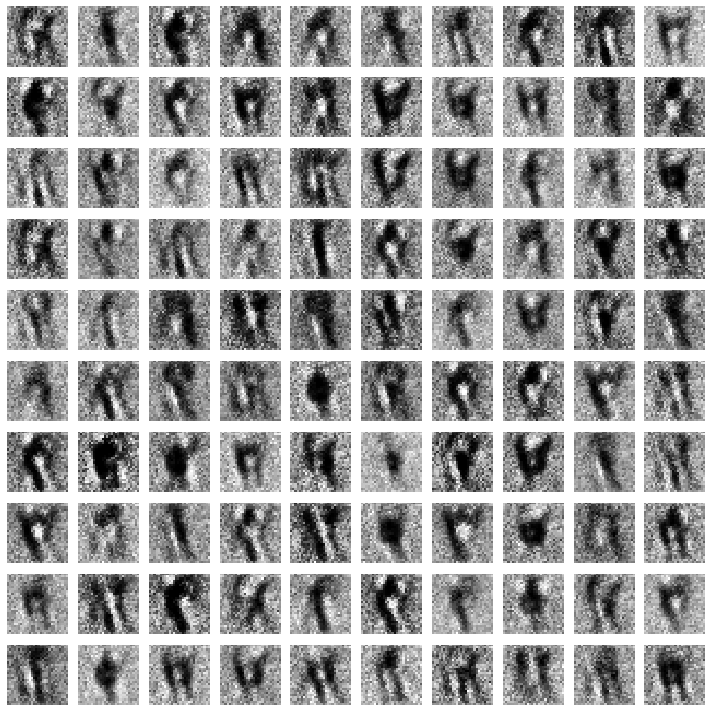

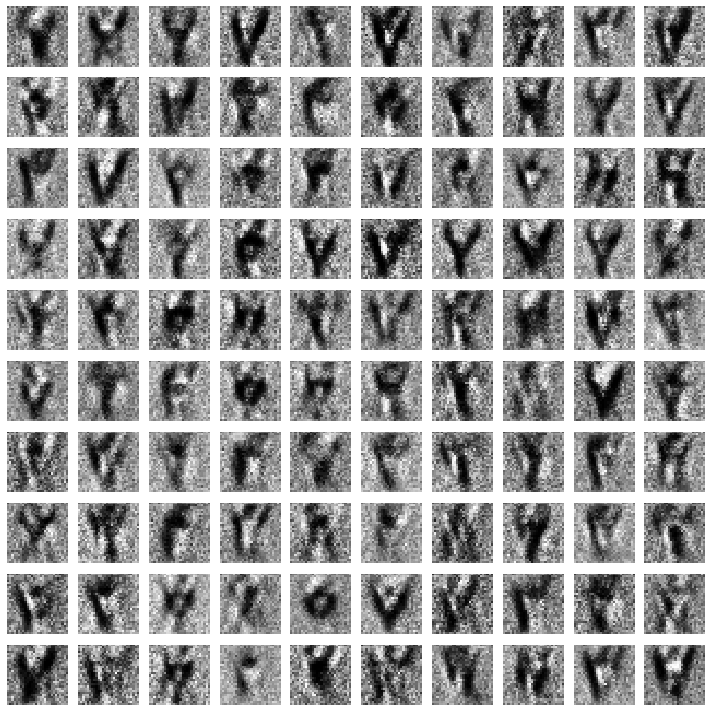

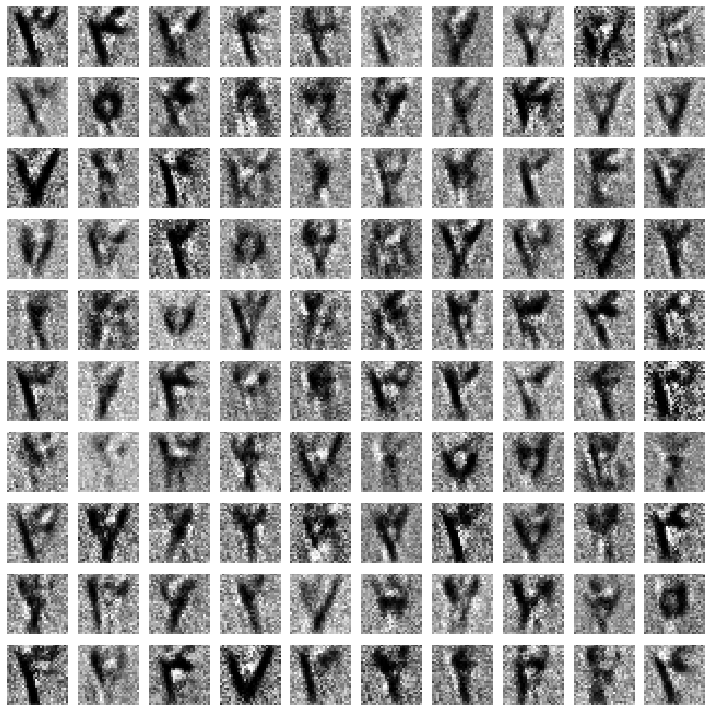

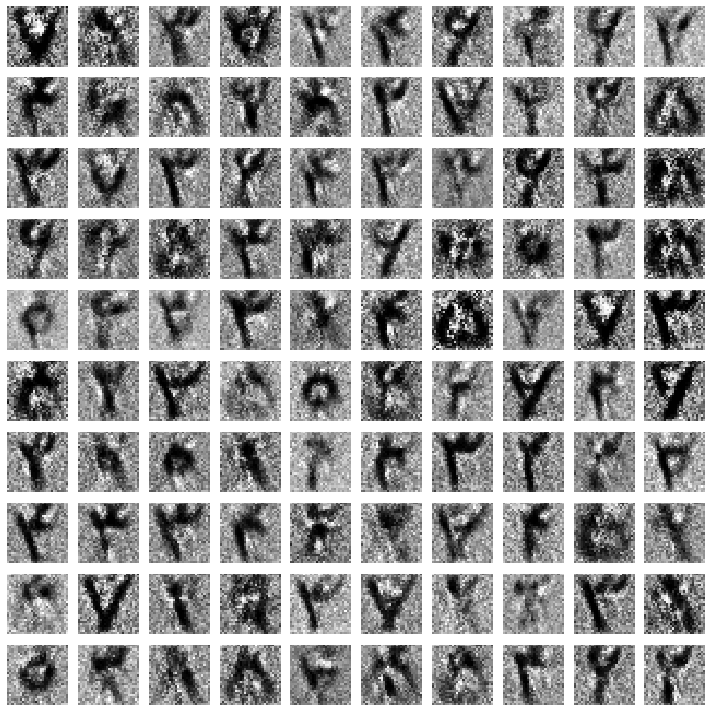

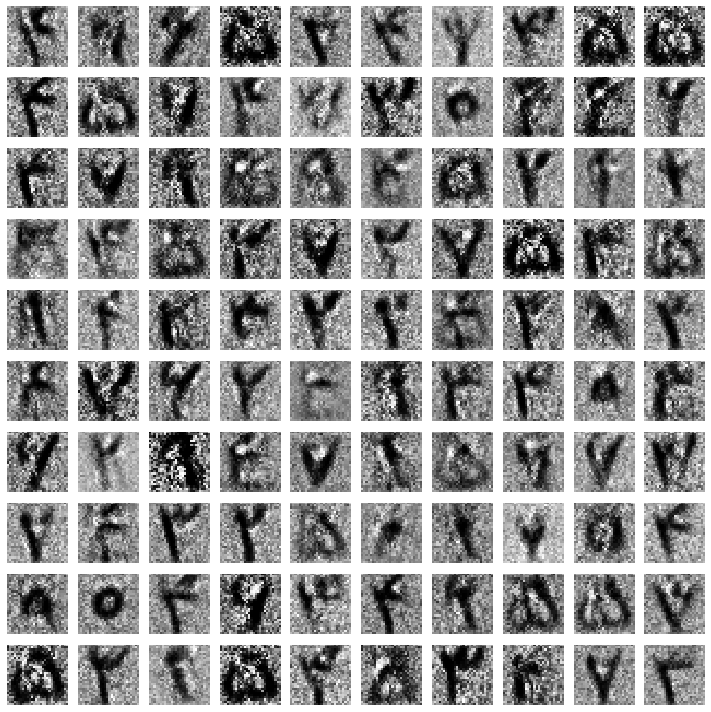

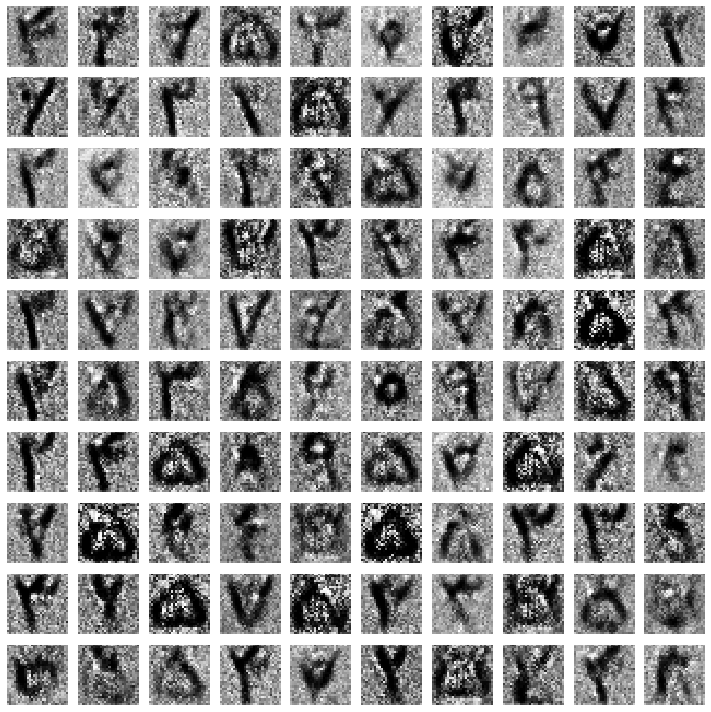

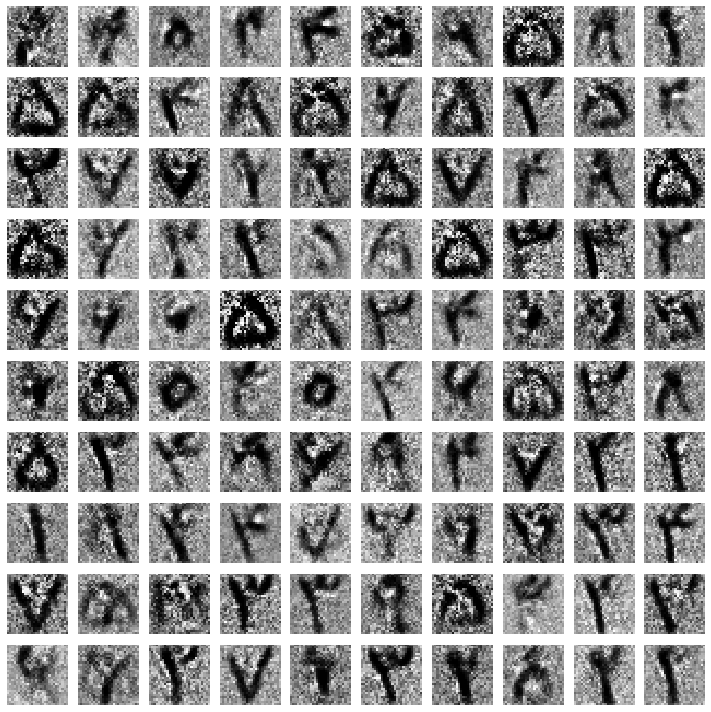

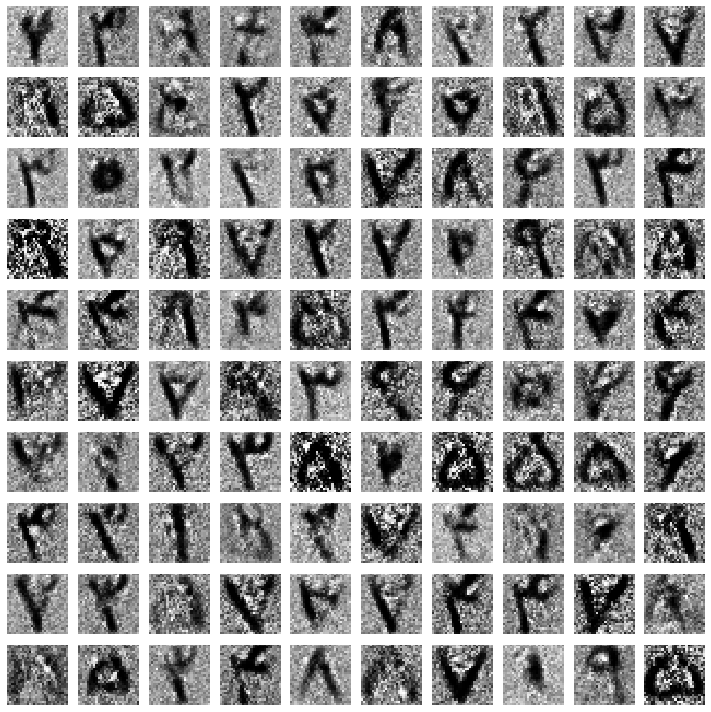

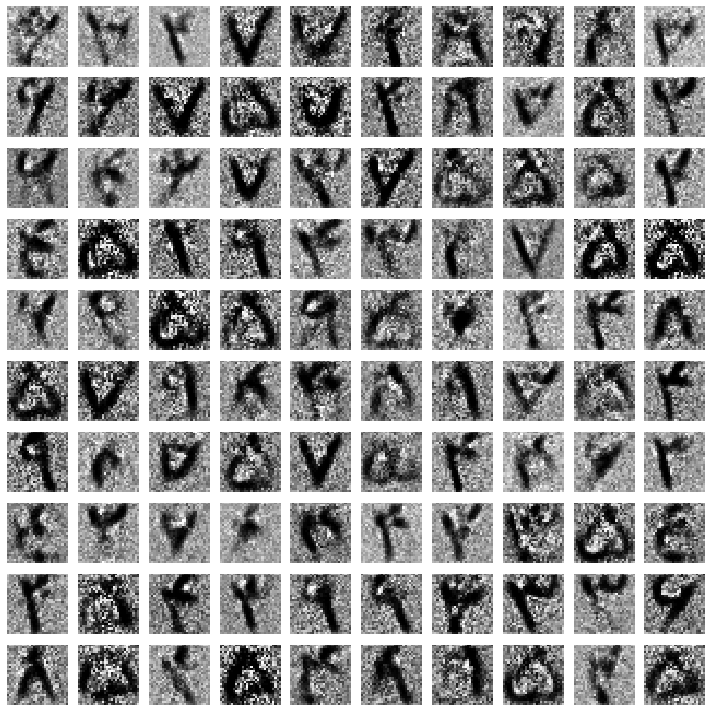

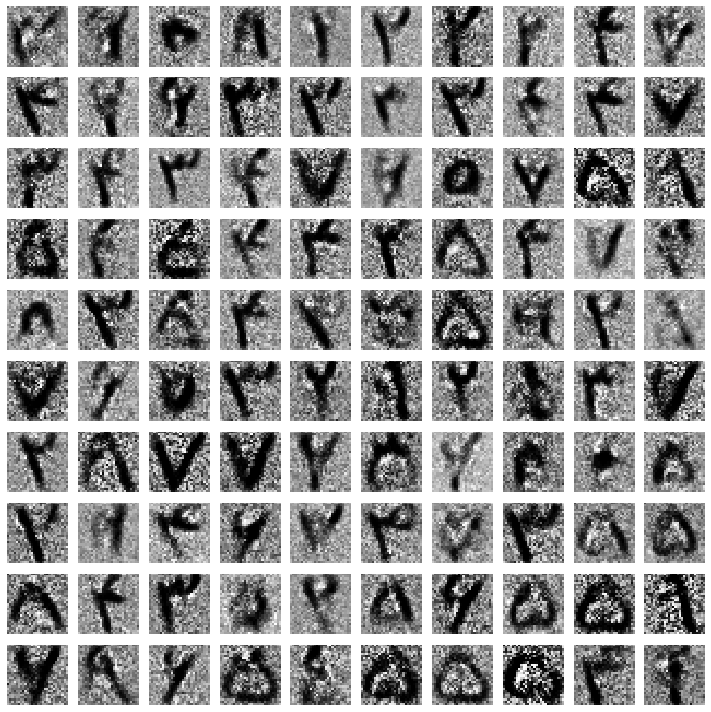

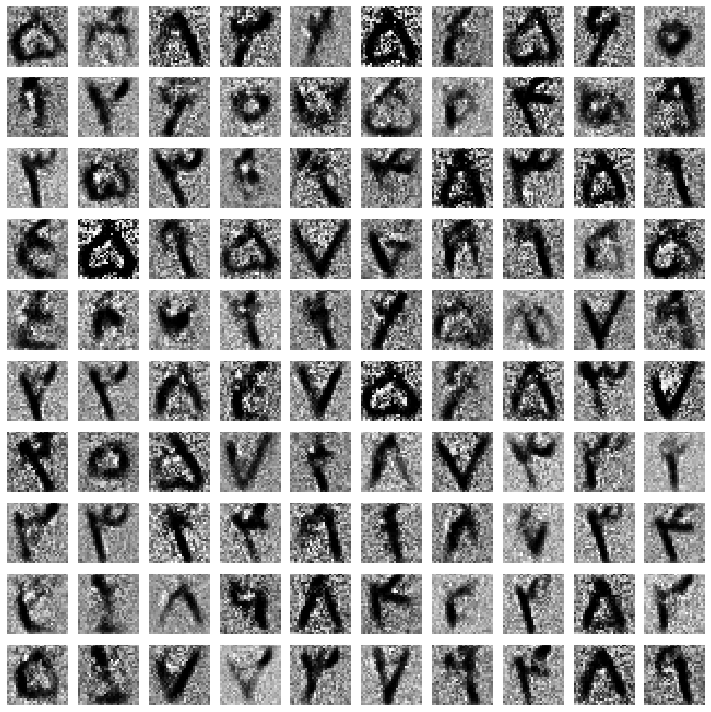

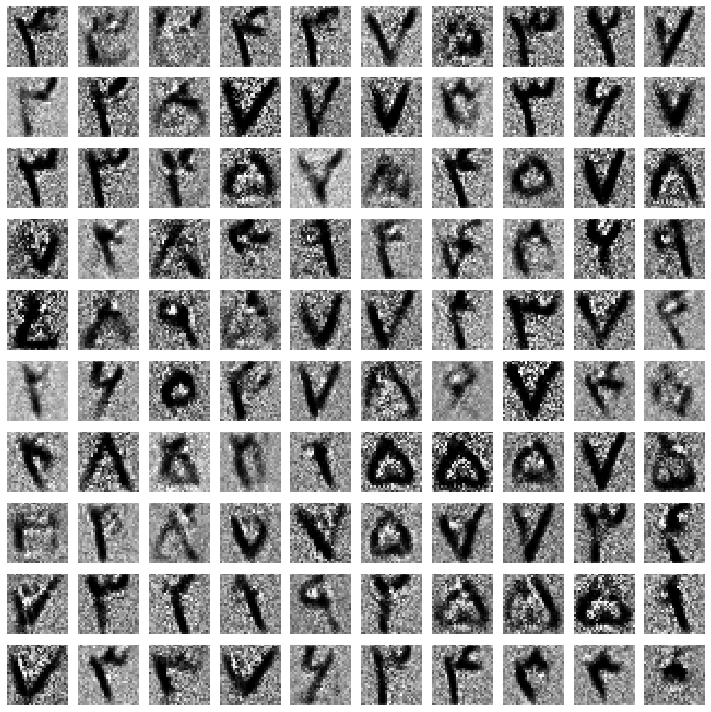

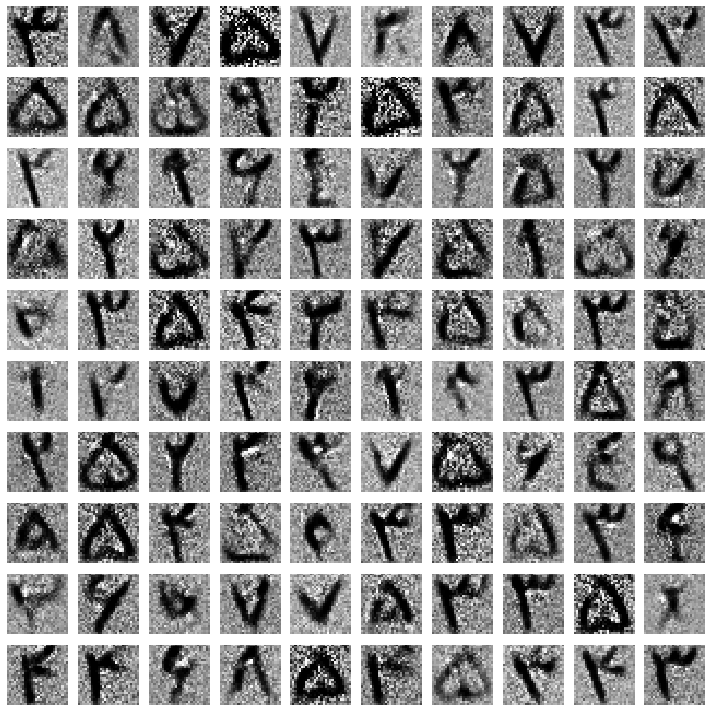

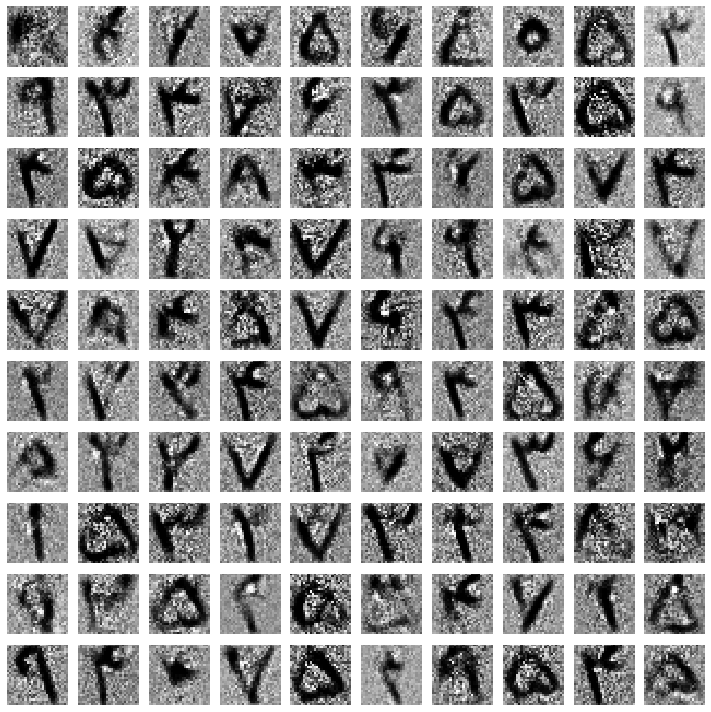

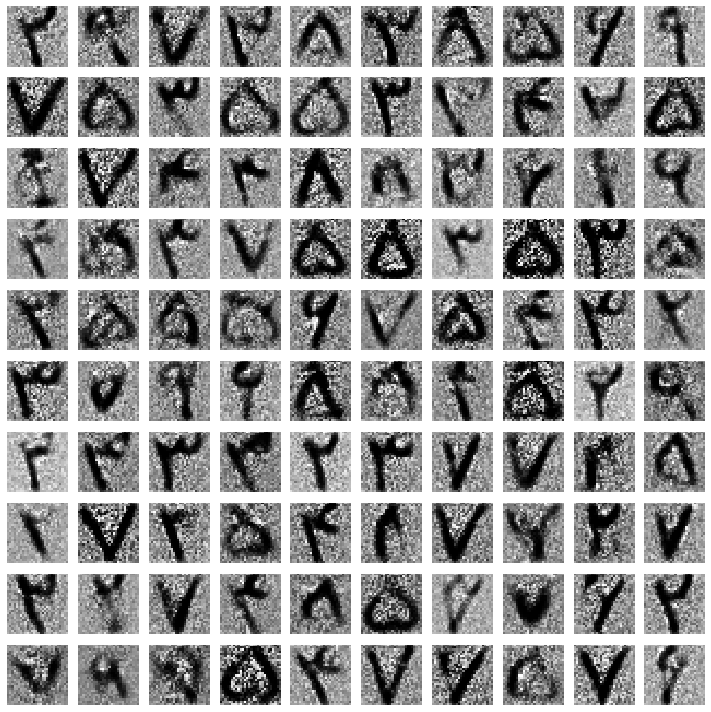

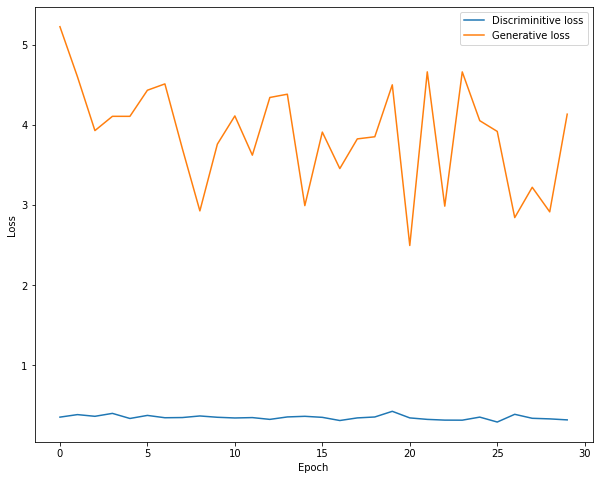

In [8]:
epochs=30
batchSize=256

batchCount = X_train.shape[0] // batchSize
print ('Epochs:', epochs)
print ('Batch size:', batchSize)
print ('Batches per epoch:', batchCount)

for e in range(1, epochs+1):
    print ('-'*15, 'Epoch %d' % e, '-'*15)
    for _ in tqdm(range(batchCount)):
        # Get a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batchSize, randomDim])
        imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

        # Generate fake Hoda images
        generatedImages = generator.predict(noise)
        # print np.shape(imageBatch), np.shape(generatedImages)
        X = np.concatenate([imageBatch, generatedImages])

        # Labels for generated and real data
        yDis = np.zeros(2*batchSize)
        # One-sided label smoothing
        yDis[:batchSize] = 0.9

        # Train discriminator
        discriminator.trainable = True
        dloss = discriminator.train_on_batch(X, yDis)

        # Train generator
        noise = np.random.normal(0, 1, size=[batchSize, randomDim])
        yGen = np.ones(batchSize)
        discriminator.trainable = False
        gloss = gan.train_on_batch(noise, yGen)

    # Store loss of most recent batch from this epoch
    dLosses.append(dloss)
    gLosses.append(gloss)

    if e == 1 or e % 2 == 0:
        plotGeneratedImages(e)
        #saveModels(e)

# Plot losses from every epoch
plotLoss(e)

